# A simple neural network framework

In this section, we will build a simple neural network framework and use it to re-implement multiclass logistic regression in the previous section. This framework is also the start point of more advanced models in following sections.

In [1]:
import gzip
import array
import struct
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_int32(fin):
    buf = fin.read(4)
    return struct.unpack('>i', buf)[0]

def read_byte(fin):
    buf = fin.read(1)
    return struct.unpack('B', buf)[0]

def read_images(fin):
    magic = read_int32(fin)
    assert magic == 0x00000803, "magic number != 0x%08x" % magic
    num_images = read_int32(fin)
    num_rows = read_int32(fin)
    num_cols = read_int32(fin)
    data = array.array('B')
    data.fromfile(fin, num_images * num_rows * num_cols)
    return np.array(data).reshape((num_images, num_rows, num_cols))

def read_labels(fin):
    magic = read_int32(fin)
    assert magic == 0x00000801, "magic number != 0x%08x" % magic
    num_labels = read_int32(fin)
    data = array.array('B')
    data.fromfile(fin, num_labels)
    return np.array(data)

In [3]:
with gzip.open('data/3/train-images-idx3-ubyte.gz') as fin:
    train_images = read_images(fin)

with gzip.open('data/3/train-labels-idx1-ubyte.gz') as fin:
    train_labels = read_labels(fin)

with gzip.open('data/3/t10k-images-idx3-ubyte.gz') as fin:
    test_images = read_images(fin)

with gzip.open('data/3/t10k-labels-idx1-ubyte.gz') as fin:
    test_labels = read_labels(fin)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def show_image(img, title=""):
    img = np.tile(img[:, :, np.newaxis], (1, 1, 3))
    plt.figure()
    plt.title(title)
    return plt.imshow(img,)

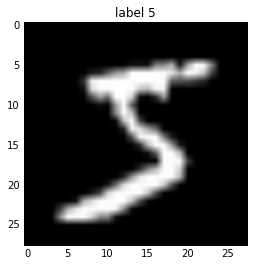

In [5]:
show_image(train_images[0], "label %d" % train_labels[0])

In [6]:
num_examples, num_rows, num_cols = train_images.shape
num_tests, _, _ = test_images.shape
num_inputs = num_rows * num_cols
num_outputs = 10

In [7]:
train_inputs = train_images.reshape(num_examples, num_inputs) / 255
test_inputs = test_images.reshape(num_tests, num_inputs) / 255

train_inputs.shape, train_inputs.shape

((60000, 784), (60000, 784))

In [8]:
from common import transform_to_one_hot

train_outputs = transform_to_one_hot(train_labels, num_outputs)
test_outputs = transform_to_one_hot(test_labels, num_outputs)

train_outputs.shape, test_outputs.shape

((60000, 10), (10000, 10))

In [9]:
import nn
import neurons

data_layer = nn.BatchDataLayer(train_inputs, train_outputs, batch_size=64, shuffle=True)
softmax_layer = nn.FullyConnectedLayer(num_inputs, num_outputs, neurons.Softmax)
loss_layer = nn.CrossEntropyLayer(num_inputs=num_outputs)
net = nn.NeuralNetwork(data_layer, [softmax_layer], loss_layer)

In [10]:
epochs = 10
learning_rate = .002

for e in range(epochs):
    loss = net.train(learning_rate)
    # print("param", softmax_layer.parameters())
    # print("grad", softmax_layer.gradient())
    print("loss %f" % loss)

loss 133869.201114
loss 51290.953038
loss 41266.653448
loss 36385.350861
loss 33316.676606
loss 31147.610208
loss 29503.321680
loss 28195.902685
loss 27120.806641
loss 26214.948195


In [11]:
def model_predict(net, x):
    yhat = net.evaluate(x)
    pred = np.argmax(yhat, axis=1)
    return pred

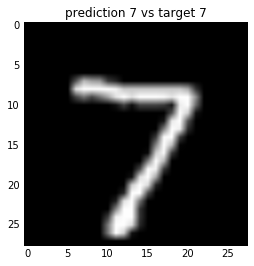

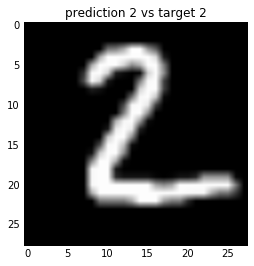

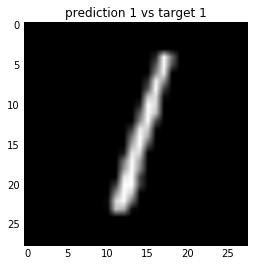

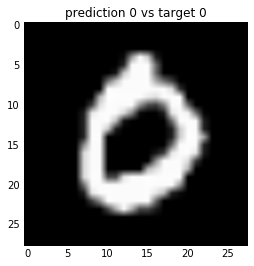

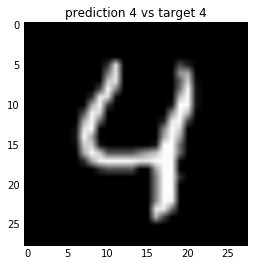

In [12]:
for i in range(5):
    pred_label = model_predict(net, test_inputs[np.newaxis, i])
    show_image(test_images[i], "prediction %d vs target %d" % (pred_label, test_labels[i]))

In [13]:
pred_labels = model_predict(net, test_inputs)
num_correct = np.sum(pred_labels == test_labels)
num_total = len(test_inputs)
print(num_correct / num_total)

0.8984
